In this notebook, we will detect 2 points in an image, using color detection.
Then, we will calculate the distance between those 2 points.

In [ ]:
import numpy as np
import cv2
from PIL import Image
import math
import matplotlib.pyplot as plt

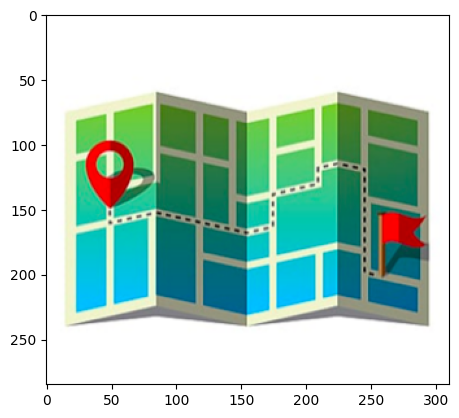

In [ ]:
map = cv2.imread("map.png")
map_img_rgb = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.imshow(map_img_rgb)

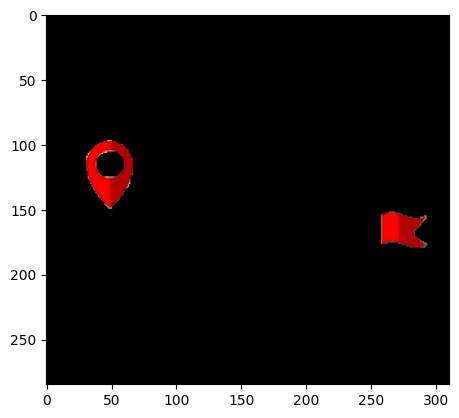

In [ ]:
# Define lower and upper HSV ranges for red, green, and yellow
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

img_hsv=cv2.cvtColor(map, cv2.COLOR_BGR2HSV)
# Create masks for red, green, and yellow
mask_red1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)

mask=mask_red1 + mask_red2
map[np.where(mask == 0)] = 0

output_img=cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.imshow(output_img)

In [ ]:
# Find the non-zero points in the mask
non_zero_points = np.nonzero(output_img)

In [ ]:
# Extract x and y coordinates of non-zero points
x_coordinates = non_zero_points[1]
y_coordinates = non_zero_points[0]

print("Center Coordinates (X, Y) : ", x_coordinates, ",", y_coordinates)

Center Coordinates (X, Y) :  [ 47  47  47 ... 291 291 291] , [ 97  97  97 ... 179 179 179]


In [ ]:
min_x = min(x_coordinates)
max_x = max(x_coordinates)
print(min_x, max_x)

31 293


In [ ]:
min_y = min(y_coordinates)
max_y = max(y_coordinates)
print(min_y, max_y)

97 179


In [ ]:
print("Distance : ", math.sqrt((max_x-min_x) ** 2 - (max_y-min_y) ** 2))

Distance :  248.83729623993264
